<a href="https://colab.research.google.com/github/bsimon94/Python-MLOps-Cookbook/blob/main/Baseball_Predictions_Export_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Regression

This notebook is featured in [Practical MLOps book by O'Reilly](https://learning.oreilly.com/library/view/practical-mlops/9781098103002/) as well a Coursera + Duke Course.

## Ingest

Source:  http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/noahgift/functional_intro_to_python/master/data/mlb_weight_ht.csv")
df.head()

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71


Find N/A

In [ ]:
df.shape

(1034, 6)

In [ ]:
df.isnull().values.any()

np.True_

In [ ]:
df = df.dropna()
df.isnull().values.any()

np.False_

In [ ]:
df.shape

(1033, 6)

### Clean

In [ ]:
df.rename(index=str,
             columns={"Height(inches)": "Height", "Weight(pounds)": "Weight"},
             inplace=True)
df.head()


,Name,Team,Position,Height,Weight,Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71


## EDA

In [ ]:
df.describe()

,Height,Weight,Age
count,1033.000000,1033.000000,1033.000000
mean,73.698935,201.689255,28.737648
std,2.306330,20.991491,4.322298
min,67.000000,150.000000,20.900000
25%,72.000000,187.000000,25.440000
50%,74.000000,200.000000,27.930000
75%,75.000000,215.000000,31.240000
max,83.000000,290.000000,48.520000


What about positions?  What can we infer about a typical player from different positions?

In [ ]:
df_positions = df.groupby("Position")[['Height', 'Weight', 'Age']].mean()
df_positions.reset_index(inplace=True)
df_positions

,Position,Height,Weight,Age
0,Catcher,72.723684,204.328947,29.563684
1,Designated_Hitter,74.222222,220.888889,30.389444
2,First_Baseman,74.000000,213.109091,29.474727
3,Outfielder,73.010309,199.113402,28.953454
4,Relief_Pitcher,74.374603,203.517460,28.539810
5,Second_Baseman,71.362069,184.344828,29.026897
6,Shortstop,71.903846,182.923077,28.402885
7,Starting_Pitcher,74.731818,205.163636,28.238227
8,Third_Baseman,73.044444,200.955556,28.691111


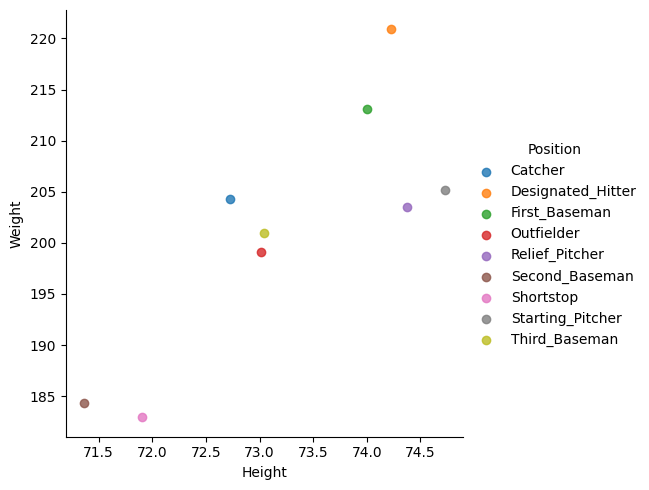

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x="Height", y="Weight",data=df_positions, hue="Position")

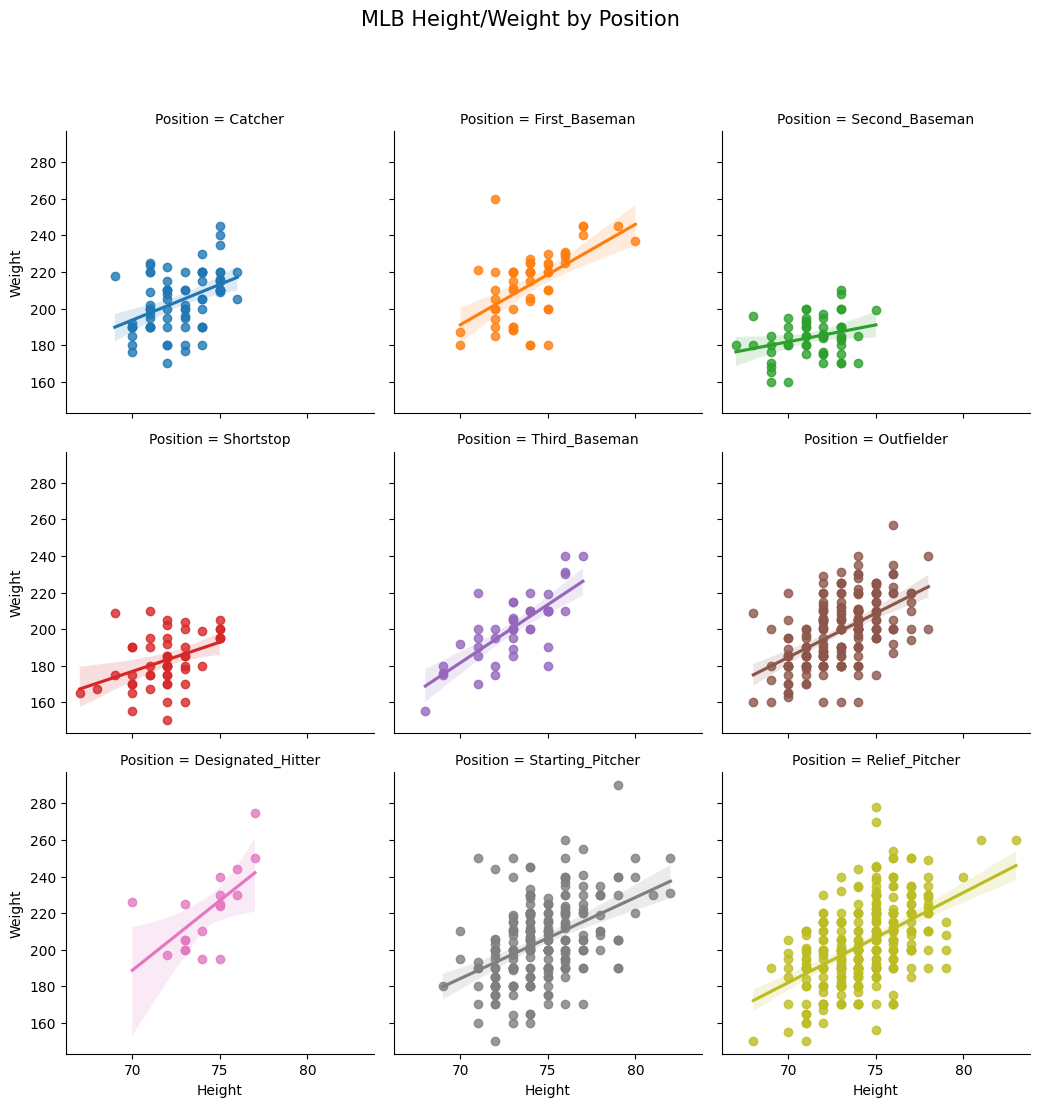

In [ ]:
import matplotlib.pyplot as plt
g = sns.FacetGrid(df, col="Position", height=3.5, col_wrap=3, hue="Position")
g.fig.suptitle("MLB Height/Weight by Position", fontsize=15, y=1.05)
g.map(sns.regplot, "Height", "Weight")

## Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Select Feature

Using Weight to Predict Height, so just one feature


In [ ]:
var = df['Height'].values
var.shape

(1033,)

In [ ]:
y = df['Height'].values #Target
y = y.reshape(-1, 1)
X = df['Weight'].values #Feature(s)
X = X.reshape(-1,1)

In [ ]:
X.shape

(1033, 1)

In [ ]:
y.shape

(1033, 1)

### Split Data and Scale Data

Scaling workflow step by step to make it easier to understand

In [ ]:
scaler = StandardScaler()

In [ ]:
X_scaler = scaler.fit(X)
X


array([[180.],
       [215.],
       [210.],
       ...,
       [205.],
       [190.],
       [195.]])

In [ ]:
X = X_scaler.transform(X)
X

array([[-1.0337408 ],
       [ 0.6344091 ],
       [ 0.39610197],
       ...,
       [ 0.15779485],
       [-0.55712654],
       [-0.31881941]])

In [ ]:
y_scaler = scaler.fit(y)
y

array([[74],
       [74],
       [72],
       ...,
       [75],
       [75],
       [73]])

In [ ]:
y = y_scaler.transform(y)
y

array([[ 0.13060176],
       [ 0.13060176],
       [-0.73699706],
       ...,
       [ 0.56440117],
       [ 0.56440117],
       [-0.30319765]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(929, 1) (929, 1)
(104, 1) (104, 1)


### Fit the model

In [ ]:
from sklearn.linear_model import Ridge
clf = Ridge()
model = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [ ]:
y_test.shape

(104, 1)

In [ ]:
predictions.shape

(104,)

unscaled predictions, converted to DataFrame and described

In [ ]:
df_predictions = pd.DataFrame(predictions)
df_predictions.describe()

,0
count,104.000000
mean,0.107363
std,0.609678
min,-1.062356
25%,-0.320895
50%,-0.039651
75%,0.471702
max,1.877922


### Plot Predictions

Let's inverse scale back to view predictions in a form we can understand, then plot

In [ ]:
df_inverse_scaled_prediction = pd.DataFrame(y_scaler.inverse_transform(y))
df_inverse_scaled_prediction.describe()

,0
count,1033.000000
mean,73.698935
std,2.306330
min,67.000000
25%,72.000000
50%,74.000000
75%,75.000000
max,83.000000


Text(0, 0.5, 'Predicted Height')

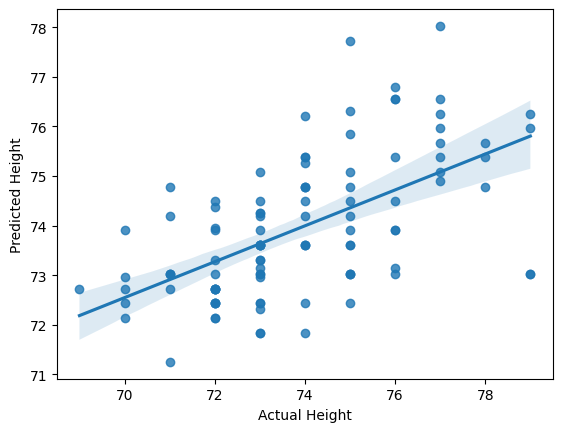

In [ ]:
plot = sns.regplot(x=y_scaler.inverse_transform(y_test), y=y_scaler.inverse_transform(predictions.reshape(-1, 1)))
plt.xlabel("Actual Height")
plt.ylabel("Predicted Height")

### Print Accuracy of Linear Regression Model

In [ ]:
model.score(X_test, y_test)

0.33624843636881474

### Export Model

In [ ]:
import joblib

In [ ]:
joblib.dump(model, 'model.joblib')

['model.joblib']

### Verify Model Import Feedbackloop

In [ ]:
clf_disk = joblib.load("model.joblib")

### Test Predict From Model Loaded From Disk

View data

In [ ]:
df.tail()

,Name,Team,Position,Height,Weight,Age
1029,Brad_Thompson,STL,Relief_Pitcher,73,190.0,25.08
1030,Tyler_Johnson,STL,Relief_Pitcher,74,180.0,25.73
1031,Chris_Narveson,STL,Relief_Pitcher,75,205.0,25.19
1032,Randy_Keisler,STL,Relief_Pitcher,75,190.0,31.01
1033,Josh_Kinney,STL,Relief_Pitcher,73,195.0,27.92


Get one observation and only get the Weight by grabbing Chris_Narveson

In [ ]:
pX = df.iloc[[1031]][["Weight"]].values #Feature(s)
pX = pX.reshape(-1,1)
pX

array([[190.]])

Scale Input

In [ ]:
target = df["Weight"].values
target = target.reshape(-1, 1)
target

array([[180.],
       [215.],
       [210.],
       ...,
       [205.],
       [190.],
       [195.]])

In [ ]:
import numpy as np
input_scaler = StandardScaler().fit(target) #scale relative to the values in the df
scaled_input = input_scaler.transform(pX)
np.array2string(scaled_input, formatter={'float_kind':'{0:.3f}'.format})

'[[-0.557]]'

Inverse Transform Predicted Height

In [ ]:
result = clf.predict(scaled_input)
print(f"Unscaled prediction {result.tolist()[0]}")
transformed_prediction = y_scaler.inverse_transform(result.reshape(-1, 1)) #Note the y_scaler is the target scaler
print(f"transformed_prediction {transformed_prediction.tolist()[0]}")

Unscaled prediction -0.29532700521079375
transformed_prediction [73.01814351207656]
